Importing Modules.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Loading the csv data.

In [7]:
data = pd.read_csv('/home/chelsey/workspace/aos/HonsUCT_IntroOceMod/data/flynn94.csv')
print(data)

    time  cells  biovolume  ammonium  cellC  chl-a
0    0.0   0.04        2.0     1.411   0.60    4.0
1    0.5   0.04        2.2     1.400   0.61    3.0
2    1.0   0.04        2.1     1.383   0.58    3.0
3    1.5   0.04        2.1     1.355    NaN    3.0
4    2.0   0.04        2.1     1.355   0.68    3.0
5    2.5   0.05        2.6     1.350   0.66    4.0
6    3.0   0.05        NaN     1.355   0.75    6.0
7    3.5   0.05        NaN     1.333   2.29    9.0
8    4.0   0.04        2.1     1.316   2.91    9.0
9    4.5   0.06        2.9     1.288   1.75   14.0
10   5.0   0.05        2.3     1.288   1.49   14.0
11   5.5   0.05        NaN     1.260   2.14   17.0
12   6.0   0.10        NaN     1.257   1.58   18.0
13   6.5   0.10        NaN     1.226   2.07   41.0
14   7.0   0.15        7.4     1.226   2.04   41.0
15   7.5   0.15        NaN     1.092   2.66   50.0
16   8.0   0.23        NaN     1.092   2.25   53.0
17   8.5   0.22       13.4     0.935   4.12   68.0
18   9.0   0.28       13.9     

Print basic info.

In [9]:
print("Columns:", data.columns.tolist())
print("Data types:")
print(data.dtypes)
print(f"Number of rows: {len(data)}")
print(f"Number of columns: {len(data.columns)}")


Columns: ['time', 'cells', 'biovolume', 'ammonium', 'cellC', 'chl-a']
Data types:
time         float64
cells        float64
biovolume    float64
ammonium     float64
cellC        float64
chl-a        float64
dtype: object
Number of rows: 48
Number of columns: 6


Print summary statistics and count of missing values per column.

In [10]:
# Print summary statistics
print("\nSummary statistics:")
print(data.describe(include='all'))

# Print count of missing values per column
print("\nMissing values per column:")
print(data.isnull().sum())


Summary statistics:
            time      cells   biovolume   ammonium      cellC       chl-a
count  48.000000  48.000000   38.000000  48.000000  43.000000   45.000000
mean   12.041667   0.926458   48.892105   0.565896  10.977907  199.311111
std     7.406749   0.812182   37.632608   0.602224   9.627728  166.674809
min     0.000000   0.040000    2.000000   0.000000   0.580000    3.000000
25%     5.875000   0.090000    8.900000   0.000000   2.105000   17.000000
50%    11.750000   0.775000   53.200000   0.282500   8.420000  210.000000
75%    18.125000   1.907500   85.650000   1.257750  19.385000  368.000000
max    25.000000   2.000000  106.400000   1.411000  27.490000  440.000000

Missing values per column:
time          0
cells         0
biovolume    10
ammonium      0
cellC         5
chl-a         3
dtype: int64


Fill the missing values with zero.

In [11]:
# Fill missing values with zero
data_filled = data.fillna(0)

# Print count of missing values per column
print("\nMissing values per column:")


Missing values per column:


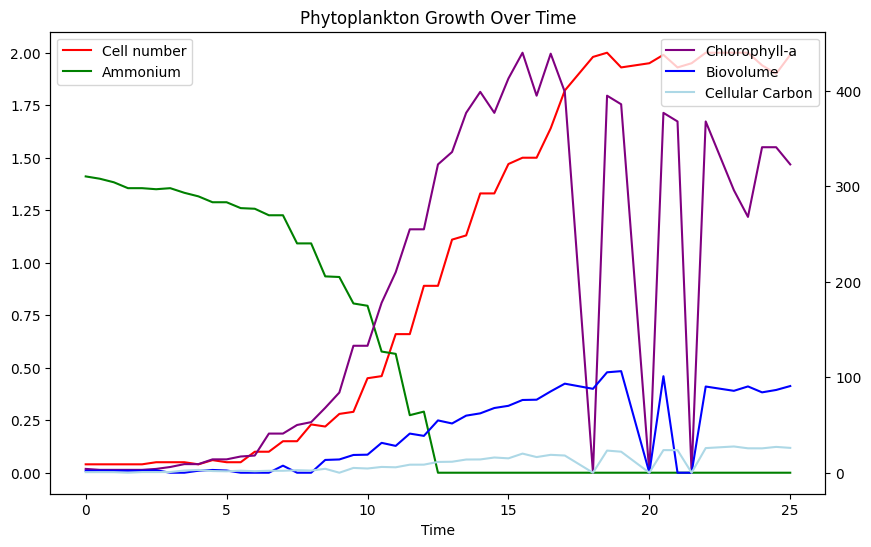

In [ ]:
# Plot cell number and cellular carbon over time with chlorophyll on a separate y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(data_filled['time'], data_filled['cells'], color='red',label='Cell number')
ax1.plot(data_filled['time'], data_filled['ammonium'],color='green', label='Ammonium')
ax1.set_xlabel('Time')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(data_filled['time'], data_filled['chl-a'], color='purple', label='Chlorophyll-a')
ax2.plot(data_filled['time'], data_filled['biovolume'], color='blue', label='Biovolume')
ax2.plot(data_filled['time'], data_filled['cellC'],color='lightblue', label='Cellular Carbon')
ax2.legend(loc='upper right')

plt.title('Phytoplankton Growth Over Time')
plt.show()



Define exponential growth function


In [29]:
# Define exponential growth function
def exponential_growth(t, N0, r):
    return N0 * np.exp(r * t)